# Árbol de decisión - Empresa de Telecomunicaciones

- Institución: Instituto Superior de Formación Técnica N° 197
- Carrera: Técnicatura Superior en Ciencia de Datos e Inteligencia Artificial
- Cátedra: Procesamiento de Aprendizaje Automático.
- Docente: Yanina Scudero
- Alumno: Lucas Nahuel Oviedo
- Año: 2025

En esté trabajo práctico una empresa de telecomunicaciones quiere predecir si un cliente aceptará una oferat de plan de datos móviles. Para ello, se dispone de un conjunto de datos con información de 10 clientes, incluyendo los siguientes atributos:
- Edad (en años)
- Nivel de uso mensual de datos (en GB)
- Tiene línea fija (Sí/No)
- Aceptó la oferta (Sí/No)

Partidendo de la consigna anteriormente planteada se procede a analizar los datos suministrados utilizando la biblioteca PANDAS y posteriormente se realizan los calculos necesarios para obtener la entropía del conjunto original y de los diferentes subconjuntos que se desprenden de los distintos atributos para finalmente seleccionar el mejor de ellos y construir el **árbol de decisión**.

Esté *Notebook* se dividira en las siguientes secciones:
- Bibliotecas a utilizar
- Datos
- Entrpía del conjunto original
- Atributos a evaluar
    - Calculo entropía: edad
    - Cálculo entropía: tiene línea fija
    - Cálculo entropía: uso de datos
- Análisis de ganacia de información
- Construcción del Árbol de Decisión
- Conclusiones

## Bibliotecas a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Datos

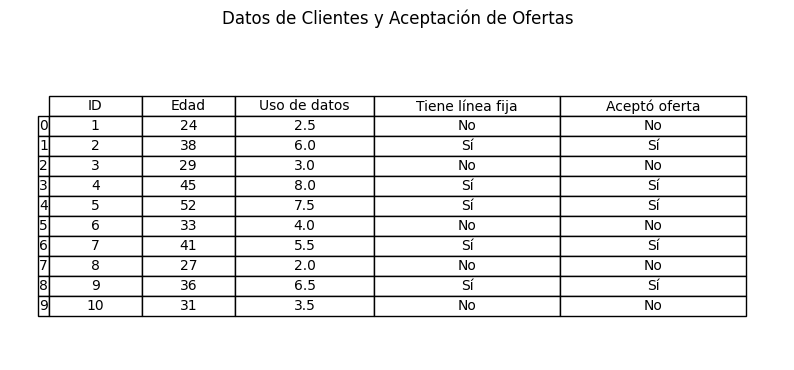

In [ ]:
# Lista de diccionarios con los datos
datos = [
    {'ID': 1, 'Edad': 24, 'Uso de datos': 2.5, 'Tiene línea fija': 'No', 'Aceptó oferta': 'No'},
    {'ID': 2, 'Edad': 38, 'Uso de datos': 6.0, 'Tiene línea fija': 'Sí', 'Aceptó oferta': 'Sí'},
    {'ID': 3, 'Edad': 29, 'Uso de datos': 3.0, 'Tiene línea fija': 'No', 'Aceptó oferta': 'No'},
    {'ID': 4, 'Edad': 45, 'Uso de datos': 8.0, 'Tiene línea fija': 'Sí', 'Aceptó oferta': 'Sí'},
    {'ID': 5, 'Edad': 52, 'Uso de datos': 7.5, 'Tiene línea fija': 'Sí', 'Aceptó oferta': 'Sí'},
    {'ID': 6, 'Edad': 33, 'Uso de datos': 4.0, 'Tiene línea fija': 'No', 'Aceptó oferta': 'No'},
    {'ID': 7, 'Edad': 41, 'Uso de datos': 5.5, 'Tiene línea fija': 'Sí', 'Aceptó oferta': 'Sí'},
    {'ID': 8, 'Edad': 27, 'Uso de datos': 2.0, 'Tiene línea fija': 'No', 'Aceptó oferta': 'No'},
    {'ID': 9, 'Edad': 36, 'Uso de datos': 6.5, 'Tiene línea fija': 'Sí', 'Aceptó oferta': 'Sí'},
    {'ID': 10, 'Edad': 31, 'Uso de datos': 3.5, 'Tiene línea fija': 'No', 'Aceptó oferta': 'No'}
]

# DataFrame de Pandas

df = pd.DataFrame(datos)

# Gráfico de tabla con Matplotlib
# Configurar estilo y tamaño
plt.figure(figsize=(10, 4))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Crear la tabla
tabla = pd.plotting.table(ax, df, loc='center', cellLoc='center', colWidths=[0.1, 0.1, 0.15, 0.2, 0.2])

# Formatear la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)

plt.title('Datos de Clientes y Aceptación de Ofertas', pad=20)
plt.show()

## Entropía del conjunto original

In [3]:
# Datos del conjunto
# Aceptó oferta: Sí = 5, No = 5
total = 10
aceptaron_oferta = 5
no_aceptaron = 5
# Probabilidades
p_si = aceptaron_oferta / total
p_no = no_aceptaron / total
# Cálculo de entropía
entropy_original = - (p_si * math.log2(p_si) + p_no * math.log2(p_no))
print(f"Entropía del conjunto original: {entropy_original:.3f}")

Entropía del conjunto original: 1.000


## Atributos a evaluar
- Edad
- Tiene línea fija
- Uso de datos

#### Cálculo entropía: edad
Se divide el atributo en tres subconjuntos según los siguientes rangos:
- Jovén <= 30
- Adulto 31 - 50
- Mayor >50

In [ ]:
# Organización de los datos por rangos de edad
df['Rango Edad'] = pd.cut(df['Edad'],
                          bins = [0,30,50, float('inf')],
                          labels = ["Jovén","Adulto", "Mayor"],
                          right = False)# right=False significa ≤ en el límite inferior

print(df)

print(df['Rango Edad'].value_counts())
#Uso de tabla cruzada (crosstab) para ver la relación entre Rango de Edad y Aceptación de oferta
print(pd.crosstab(df['Rango Edad'], df['Aceptó oferta']))

   ID  Edad  Uso de datos Tiene línea fija Aceptó oferta Rango Edad
0   1    24           2.5               No            No      Jovén
1   2    38           6.0               Sí            Sí     Adulto
2   3    29           3.0               No            No      Jovén
3   4    45           8.0               Sí            Sí     Adulto
4   5    52           7.5               Sí            Sí      Mayor
5   6    33           4.0               No            No     Adulto
6   7    41           5.5               Sí            Sí     Adulto
7   8    27           2.0               No            No      Jovén
8   9    36           6.5               Sí            Sí     Adulto
9  10    31           3.5               No            No     Adulto
Rango Edad
Adulto    6
Jovén     3
Mayor     1
Name: count, dtype: int64
Aceptó oferta  No  Sí
Rango Edad           
Jovén           3   0
Adulto          2   4
Mayor           0   1


In [5]:
# Agrupamos edades en rangos: Joven (≤30), Adulto (31–50), Mayor (>50)
#p1 = aceptaron_oferta
#p2 = no_aceptaron
# Entropía de cada grupo
def entropy(p1, p2):
    total = p1 + p2
    if total == 0 or p1 == 0 or p2 == 0:
        return 0.0
    p1 /= total
    p2 /= total
    return - (p1 * math.log2(p1) + p2 * math.log2(p2))

# Joven: 0 sí, 3 no
H_joven = entropy(0, 3)
# Adulto: 4 sí, 2 no
H_adulto = entropy(4, 2)
# Mayor: 1 sí, 0 no
H_mayor = entropy(1, 0)

# Entropía ponderada
H_division = (3/10)*H_joven + (6/10)*H_adulto + (1/10)*H_mayor

# Ganancia de información
ganancia_edad = entropy_original - H_division

print("Entropía del conjunto original: ", entropy_original)
print("Eentropia ponderada: ", H_division)
print("Ganancia de Información con el atributo edad: ", ganancia_edad)

Entropía del conjunto original:  1.0
Eentropia ponderada:  0.5509775004326937
Ganancia de Información con el atributo edad:  0.44902249956730633


#### Cálculo de entropía: línea fija

In [6]:
#Subconjunto Tiene Línea Fija Aceptaron -> Se crea un subconjunto de 5
pi_aceptaron = 5/5
pi_no_aceptaron = 0/5

#Se usa el if para evitar el error que ocurre al hacer log2(0) evitando la operación que genera ese error. Por eso la fórmula para obtener la entropía esta a la mitad. 
if pi_aceptaron > 0:
    entropy_aceptaron = -(pi_aceptaron*math.log2(pi_aceptaron)) #Se retira la parte de la fórmula que provoca el error.
else:
    entropy_aceptaron = -(pi_no_aceptaron*math.log2(pi_no_aceptaron))


#Subconjunto Tiene Línea FIja No Aceptaron -> Se crea un subconjunto de 5
pe_aceptaron = 0/5
pe_no_aceptaron = 5/5
#Se usa el if para evitar el error que ocurre al hacer log2(0) 
if pe_aceptaron > 0:
    entropy_no_aceptaron = -(pe_aceptaron*math.log2(pe_aceptaron)) 
else:
    entropy_no_aceptaron = -(pe_no_aceptaron*math.log2(pe_no_aceptaron))


#Entropia Ponderada
entropia_linea_ponderada= (5/10)*(entropy_aceptaron) + (5/10)*(entropy_no_aceptaron)

print("Entropía ponderada: ", entropia_linea_ponderada)

ganancia = entropy_original - entropia_linea_ponderada

print ("Ganancia del atributo: ",ganancia)

Entropía ponderada:  -0.0
Ganancia del atributo:  1.0


#### Cálculo de entropía: uso de datos
Se divide el atributo en tres subconjuntos según los siguientes rangos:
- Bajo <= 3
- Medio 3.1 - 6
- Alto > 6

In [ ]:
# Organización de los datos por uso de datos
df['Grupos por datos'] = pd.cut(df['Uso de datos'],
                          bins = [0,3.1,6.1, float('inf')],
                          labels = ["Bajo","Medio", "Alto"],
                          right = False)# right=False significa ≤ en el límite inferior

print(df)

print(df['Grupos por datos'].value_counts())
#Uso de tabla cruzada (crosstab) para ver la relación entre Grupo de Datos y Aceptación de oferta.
print(pd.crosstab(df['Grupos por datos'], df['Aceptó oferta']))

   ID  Edad  Uso de datos Tiene línea fija Aceptó oferta Rango Edad  \
0   1    24           2.5               No            No      Jovén   
1   2    38           6.0               Sí            Sí     Adulto   
2   3    29           3.0               No            No      Jovén   
3   4    45           8.0               Sí            Sí     Adulto   
4   5    52           7.5               Sí            Sí      Mayor   
5   6    33           4.0               No            No     Adulto   
6   7    41           5.5               Sí            Sí     Adulto   
7   8    27           2.0               No            No      Jovén   
8   9    36           6.5               Sí            Sí     Adulto   
9  10    31           3.5               No            No     Adulto   

  Grupos por datos  
0             Bajo  
1            Medio  
2             Bajo  
3             Alto  
4             Alto  
5            Medio  
6            Medio  
7             Bajo  
8             Alto  
9       

In [ ]:
# Agrupamos edades en rangos: Bajo (≤3GB), Medio (3.1–6GB), Alto (>6GB)
#p1 = aceptaron_oferta
#p2 = no_aceptaron
# Entropía de cada grupo
def entropy(p1, p2):
    total = p1 + p2
    if total == 0 or p1 == 0 or p2 == 0:
        return 0.0
    p1 /= total
    p2 /= total
    return - (p1 * math.log2(p1) + p2 * math.log2(p2))

# Bajo: 0 sí, 3 no
H_bajo = entropy(0, 3)
# Medio: 2 sí, 2 no
H_medio = entropy(2, 2)
# Alto: 3 sí, 0 no
H_alto = entropy(3, 0)

# Entropía ponderada
H_division = (3/10)*H_bajo + (4/10)*H_medio + (3/10)*H_alto

# Ganancia de información
ganancia_uso_de_datos = entropy_original - H_division

print("Entropía del conjunto original: ", entropy_original)
print("Eentropia ponderada: ", H_division)
print("Ganancia de Información con el atributo edad: ", ganancia_uso_de_datos)

Entropía del conjunto original:  1.0
Eentropia ponderada:  0.4
Ganancia de Información con el atributo edad:  0.6


## Análisis de Ganancia de Información

De los cálculos obtenemos:
- Tiene línea fija: Ganancia = 1.0
- Edad: Ganancia = 0.4490
- Uso de datos: Ganancia = 0.6


## Construcción del Árbol de decisión

¿Tiene línea fija?

├── Sí → Clase: "Aceptó la oferta"

└── No → Clase: "No aceptó la oferta"

Con este árbol simple obtenemos:

- Precisión: 100% (10/10 casos clasificados correctamente)
- Complejidad: Mínima (solo 1 atributo necesario)
- Interpretabilidad: Muy alta

Este ejemplo representa un caso ideal donde un solo atributo es suficiente para clasificar perfectamente todos los ejemplos. 

## Conclusiones

De la información obtenida encontramos que **Tiene Línea Fija** es la mejor división porque su ganancia es perfecta (1.0) lo que separa perfectamente las clases creando dos subconjuntos 100% puros.

- Subconjunto "Sí": 5 personas de 10
- Subconjunto "NO": 5 personas de 10

Ambos subconjuntos tienen una entropía de 0, debido a que son puros, que hace innecesario dividir aún más porque cada rama clasifica perfectamente alcanzando la ganancia máxima posible que es 1.0. Esta ganancia perfecta vuelve a **Tiene Línea Fija** como raíz del árbol. 